In [1]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter

# define the dataset location
filename = 'oil-spill.csv'

# load the csv file as a data frame
dataframe = read_csv(filename, header=None)

# summarize the shape of the dataset
print(dataframe.shape)

# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

(937, 50)
Class=1, Count=41, Percentage=4.376%
Class=0, Count=896, Percentage=95.624%


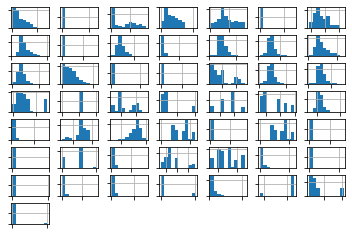

In [2]:
# create histograms of each variable
from pandas import read_csv
from matplotlib import pyplot

# define the dataset location
filename = 'oil-spill.csv'

# load the csv file as a data frame
dataframe = read_csv(filename, header=None)

# create a histogram plot of each variable
ax = dataframe.hist()

# disable axis labels
for axis in ax.flatten():
    axis.set_title('')
    axis.set_xticklabels([])
    axis.set_yticklabels([])
pyplot.show()

In [3]:
# test harness and baseline model evaluation
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

# load the dataset
def load_dataset(full_path):
    
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    
    # drop unused columns
    data.drop(22, axis=1, inplace=True)
    data.drop(0, axis=1, inplace=True)
    
    # retrieve numpy array
    data = data.values
    
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y

# evaluate a model
def evaluate_model(X, y, model):
    
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation the metric
    metric = make_scorer(geometric_mean_score)
    
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define the location of the dataset
full_path = 'oil-spill.csv'

# load the dataset
X, y = load_dataset(full_path)

# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))

# define the reference model
model = DummyClassifier(strategy='uniform')

# evaluate the model
scores = evaluate_model(X, y, model)

# summarize performance
print('Mean G-Mean: %.3f (%.3f)' % (mean(scores), std(scores)))

(937, 47) (937,) Counter({0: 896, 1: 41})
Mean G-Mean: 0.463 (0.183)


>LR 0.672 (0.203)
>LDA 0.755 (0.147)
>NB 0.707 (0.202)


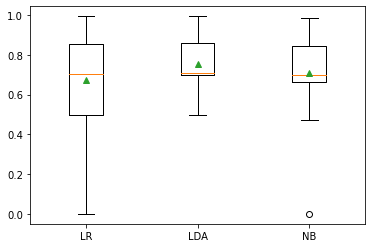

In [4]:
# compare probabilistic model on the oil spill dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from imblearn.metrics import geometric_mean_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# load the dataset
def load_dataset(full_path):
    
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    
    # drop unused columns
    data.drop(22, axis=1, inplace=True)
    data.drop(0, axis=1, inplace=True)
    
    # retrieve numpy array
    data = data.values
    
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y

# evaluate a model
def evaluate_model(X, y, model):
    
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation the metric
    metric = make_scorer(geometric_mean_score)
    
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    
    # LR
    steps = [('t',StandardScaler()),('m',LogisticRegression(solver='liblinear'))]
    models.append(Pipeline(steps=steps))
    names.append('LR')
    
    # LDA
    steps = [('t', StandardScaler()),('m',LinearDiscriminantAnalysis())]
    models.append(Pipeline(steps=steps))
    names.append('LDA')
    
    # NB
    models.append(GaussianNB())
    names.append('NB')
    return models, names

# define the location of the dataset
full_path = 'oil-spill.csv'

# load the dataset
X, y = load_dataset(full_path)

# define models
models, names = get_models()

# evaluate each model
results = list()
for i in range(len(models)):
    
    # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

    # plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>Balanced 0.831 (0.130)
>Balanced-Norm 0.836 (0.088)
>Balanced-Std 0.834 (0.129)
>Balanced-Power 0.862 (0.124)


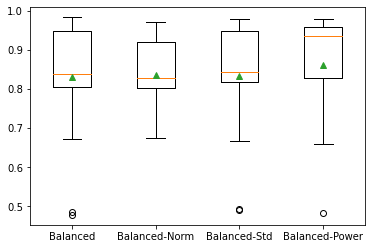

In [5]:
# compare balanced logistic regression on the oil spill dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import geometric_mean_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

# load the dataset
def load_dataset(full_path):
    
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    
    # drop unused columns
    data.drop(22, axis=1, inplace=True)
    data.drop(0, axis=1, inplace=True)
    
    # retrieve numpy array
    data = data.values
    
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y

# evaluate a model
def evaluate_model(X, y, model):
    
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation the metric
    metric = make_scorer(geometric_mean_score)
    
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    
    # LR Balanced
    models.append(LogisticRegression(solver='liblinear', class_weight='balanced'))
    names.append('Balanced')
    
    # LR Balanced + Normalization
    steps = [('t',MinMaxScaler()), ('m', LogisticRegression(solver='liblinear', class_weight='balanced'))]
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Norm')
    
    # LR Balanced + Standardization
    steps = [('t',StandardScaler()), ('m', LogisticRegression(solver='liblinear', class_weight='balanced'))]
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Std')
    
    # LR Balanced  + Power
    steps = [('t1',MinMaxScaler()), ('t2',PowerTransformer()), ('m', LogisticRegression(solver='liblinear', class_weight='balanced'))]
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Power')
    return models, names

# define the location of the dataset
full_path = 'oil-spill.csv'

# load the dataset
X, y = load_dataset(full_path)

# define models
models, names = get_models()

# evaluate each model
results = list()
for i in range(len(models)):
    
    # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>LR 0.840 (0.116)
>Norm 0.822 (0.113)
>Std 0.823 (0.134)
>Power 0.877 (0.121)


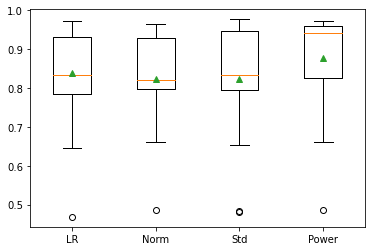

In [6]:
# compare data sampling with logistic regression on the oil spill dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import geometric_mean_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

# load the dataset
def load_dataset(full_path):
    
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    
    # drop unused columns
    data.drop(22, axis=1, inplace=True)
    data.drop(0, axis=1, inplace=True)
    
    # retrieve numpy array
    data = data.values
    
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y

# evaluate a model
def evaluate_model(X, y, model):
    
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation the metric
    metric = make_scorer(geometric_mean_score)
    
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    
    # SMOTEENN
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
    model = LogisticRegression(solver='liblinear')
    steps = [('e', sampling), ('m', model)]
    models.append(Pipeline(steps=steps))
    names.append('LR')
    
    # SMOTEENN + Norm
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
    model = LogisticRegression(solver='liblinear')
    steps = [('t', MinMaxScaler()), ('e', sampling), ('m', model)]
    models.append(Pipeline(steps=steps))
    names.append('Norm')
    
    # SMOTEENN + Std
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
    model = LogisticRegression(solver='liblinear')
    steps = [('t', StandardScaler()), ('e', sampling), ('m', model)]
    models.append(Pipeline(steps=steps))
    names.append('Std')
    
    # SMOTEENN + Power
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
    model = LogisticRegression(solver='liblinear')
    steps = [('t1', MinMaxScaler()), ('t2', PowerTransformer()), ('e', sampling), ('m', model)]
    models.append(Pipeline(steps=steps))
    names.append('Power')
    return models, names

# define the location of the dataset
full_path = 'oil-spill.csv'

# load the dataset
X, y = load_dataset(full_path)

# define models
models, names = get_models()

# evaluate each model
results = list()
for i in range(len(models)):
    
    # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
    results.append(scores)

# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [7]:
# fit a model and make predictions for the oil spill dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

# load the dataset
def load_dataset(full_path):
    
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    
    # retrieve numpy array
    data = data.values
    
    # split into input and output elements
    X, y = data[:, 1:-1], data[:, -1]
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y

# define the location of the dataset
full_path = 'oil-spill.csv'

# load the dataset
X, y = load_dataset(full_path)

# define the model
smoteenn = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
model = LogisticRegression(solver='liblinear')
pipeline = Pipeline(steps=[('e', smoteenn), ('m', model)])

# fit the model
pipeline.fit(X, y)

# evaluate on some non-spill cases (known class 0)
print('Non-Spill Cases:')
data = [[329, 1627.54, 1409.43, 51, 822500, 35, 6.1, 4610, 0.17, 178.4, 0.2, 0.24, 0.39, 0.12, 0.27, 138.32, 34.81, 2.02, 0.14, 0.19, 75.26, 0, 0.47, 351.67, 0.18, 9.24, 0.38, 2.57, -2.96, -0.28, 1.93, 0, 1.93, 34, 1710, 0, 25.84, 78, 55, 1460.31, 710.63, 451.78, 150.85, 3.23, 0, 4530.75, 66.25, 7.85],
    [3234, 1091.56, 1357.96, 32, 8085000, 40.08, 8.98, 25450, 0.22, 317.7, 0.18, 0.2, 0.49, 0.09, 0.41, 114.69, 41.87, 2.31, 0.15, 0.18, 75.26, 0, 0.53, 351.67, 0.18, 9.24, 0.24, 3.56, -3.09, -0.31, 2.17, 0, 2.17, 281, 14490, 0, 80.11, 78, 55, 4287.77, 3095.56, 1937.42, 773.69, 2.21, 0, 4927.51, 66.15, 7.24],
    [2339, 1537.68, 1633.02, 45, 5847500, 38.13, 9.29, 22110, 0.24, 264.5, 0.21, 0.26, 0.79, 0.08, 0.71, 89.49, 32.23, 2.2, 0.17, 0.22, 75.26, 0, 0.51, 351.67, 0.18, 9.24, 0.27, 4.21, -2.84, -0.29, 2.16, 0, 2.16, 228, 12150, 0, 83.6, 78, 55, 3959.8, 2404.16, 1530.38, 659.67, 2.59, 0, 4732.04, 66.34, 7.67]]
for row in data:
    
    # make prediction
    yhat = pipeline.predict([row])
    
    # get the label
    label = yhat[0]
    
    # summarize
    print('>Predicted=%d (expected 0)' % (label))

# evaluate on some spill cases (known class 1)
print('Spill Cases:')
data = [[2971, 1020.91, 630.8, 59, 7427500, 32.76, 10.48, 17380, 0.32, 427.4, 0.22, 0.29, 0.5, 0.08, 0.42, 149.87, 50.99, 1.89, 0.14, 0.18, 75.26, 0, 0.44, 351.67, 0.18, 9.24, 2.5, 10.63, -3.07, -0.28, 2.18, 0, 2.18, 164, 8730, 0, 40.67, 78, 55, 5650.88, 1749.29, 1245.07, 348.7, 4.54, 0, 25579.34, 65.78, 7.41],
    [3155, 1118.08, 469.39, 11, 7887500, 30.41, 7.99, 15880, 0.26, 496.7, 0.2, 0.26, 0.69, 0.11, 0.58, 118.11, 43.96, 1.76, 0.15, 0.18, 75.26, 0, 0.4, 351.67, 0.18, 9.24, 0.78, 8.68, -3.19, -0.33, 2.19, 0, 2.19, 150, 8100, 0, 31.97, 78, 55, 3471.31, 3059.41, 2043.9, 477.23, 1.7, 0, 28172.07, 65.72, 7.58],
    [115, 1449.85, 608.43, 88, 287500, 40.42, 7.34, 3340, 0.18, 86.1, 0.21, 0.32, 0.5, 0.17, 0.34, 71.2, 16.73, 1.82, 0.19, 0.29, 87.65, 0, 0.46, 132.78, -0.01, 3.78, 0.7, 4.79, -3.36, -0.23, 1.95, 0, 1.95, 29, 1530, 0.01, 38.8, 89, 69, 1400, 250, 150, 45.13, 9.33, 1, 31692.84, 65.81, 7.84]]
for row in data:
    
    # make prediction
    yhat = pipeline.predict([row])
    
    # get the label
    label = yhat[0]
    
    # summarize
    print('>Predicted=%d (expected 1)' % (label))

Non-Spill Cases:
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
Spill Cases:
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
